In [1]:
import os
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import sklearn as sk
import os
import time
import datetime
import math

In [2]:
path = '/home/catherinej/Downloads'
file = os.path.join(path, 'IrmaMudThicknessComparisons - Original Data.csv')
mud = pd.read_csv(file)
# mud.head()
# mud.info()
# mud.describe()
mud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 14 columns):
Region                      127 non-null object
Site                        127 non-null object
Station                     127 non-null object
Date 1                      118 non-null object
Date 2                      107 non-null object
Thickness at Date 1 (cm)    117 non-null object
Thickness at Date 2 (cm)    92 non-null float64
Thickness at Date 3 (cm)    120 non-null object
Lat                         101 non-null float64
Lon                         101 non-null float64
water_lat                   101 non-null float64
water_lon                   101 non-null float64
Notes                       14 non-null object
Unnamed: 13                 1 non-null object
dtypes: float64(5), object(9)
memory usage: 14.3+ KB


In [3]:
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6367 * c
    return (km * 1000)

In [4]:
site_lat = mud['Lat']
site_lon = mud['Lon']
ocean_lat = mud['water_lat']
ocean_lon = mud['water_lon']

In [7]:
distance = []
for i in range(len(site_lat)):
    dist = haversine(site_lon[i], site_lat[i], ocean_lon[i], ocean_lat[i])
    distance.append(dist)
dist = pd.DataFrame({'Distance': distance})
# mud = mud.join(dist) 


In [8]:
# mud = mud.join(dist)
mud.info()
mud['Site'][12]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
Region                      127 non-null object
Site                        127 non-null object
Station                     127 non-null object
Date 1                      118 non-null object
Date 2                      107 non-null object
Thickness at Date 1 (cm)    117 non-null object
Thickness at Date 2 (cm)    92 non-null float64
Thickness at Date 3 (cm)    120 non-null object
Lat                         101 non-null float64
Lon                         101 non-null float64
water_lat                   101 non-null float64
water_lon                   101 non-null float64
Notes                       14 non-null object
Unnamed: 13                 1 non-null object
Distance                    101 non-null float64
dtypes: float64(6), object(9)
memory usage: 15.3+ KB


'BW2'

In [16]:
from mud_machine_learning import clean_dataframe as cdf
from mud_machine_learning import categorize_text
mud1 = mud
train, test = cdf(mud, mud1)
train.info()
train['Thickness at Date 1 (cm)'] = train['Thickness at Date 1 (cm)'].apply(pd.to_numeric)
train['Thickness at Date 3 (cm)'] = train['Thickness at Date 3 (cm)'].apply(pd.to_numeric)
train_cat, test_cat = categorize_text(train, test)

for key in train_cat:
    if key.startswith('Site'):
        print(key)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 126
Data columns (total 12 columns):
Region                      81 non-null object
Site                        81 non-null object
Station                     81 non-null object
Thickness at Date 1 (cm)    81 non-null object
Thickness at Date 2 (cm)    81 non-null float64
Thickness at Date 3 (cm)    81 non-null object
Lat                         81 non-null float64
Lon                         81 non-null float64
water_lat                   81 non-null float64
water_lon                   81 non-null float64
Unnamed: 13                 1 non-null object
Distance                    81 non-null float64
dtypes: float64(6), object(6)
memory usage: 8.2+ KB
Site_BW3
Site_CBD
Site_CCB
Site_SNK
Site_UFU
Site_WTZ


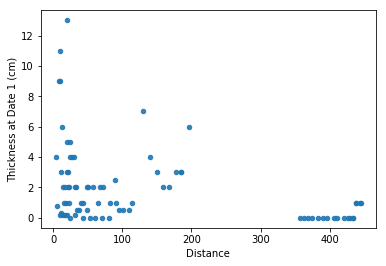

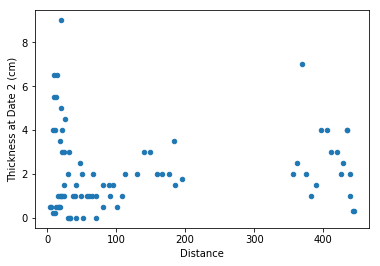

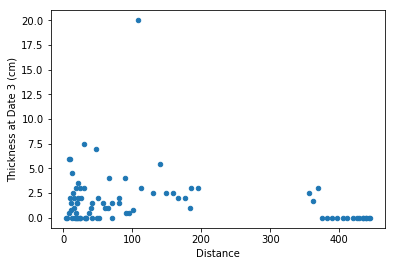

In [17]:
train.plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,)
# plt.legend()
train.plot(kind='scatter', x='Distance', y='Thickness at Date 2 (cm)', alpha=1)
# plt.legend()
train.plot(kind='scatter', x='Distance', y='Thickness at Date 3 (cm)', alpha=1)
# plt.legend()

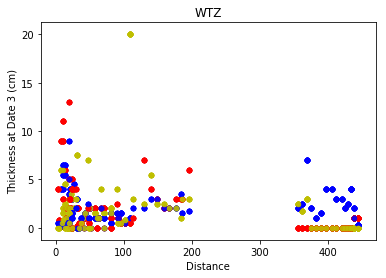

In [29]:
fig, ax = plt.subplots()
train.groupby('Site').plot(kind='scatter', x='Distance', y='Thickness at Date 1 (cm)', ax=ax)
for site in train['Site']:
#     print(site)
    s = [train.Site == site]
#     print(s)
    s = train.loc[train['Site'] == site]
   
    s.plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,ax=ax, color='r')
    s.plot(kind='scatter', x='Distance', y='Thickness at Date 2 (cm)', alpha=0.9,ax=ax, color='b')
    s.plot(kind='scatter', x='Distance', y='Thickness at Date 3 (cm)', alpha=0.9,ax=ax, color='y')
    plt.title(site)
    plt.savefig('{}_Date1vDist.png'.format(site))
    
# for site in train['Site']:
#     s = train.loc[train['Site'] == site]
#     s.plot(kind='scatter', x='Distance', y="Thickness at Date 2 (cm)", alpha=0.9,)
#     plt.title(site)
#     plt.savefig('{}_Date2vDist.png'.format(site))

        
# for site in train['Site']:
#     s = train.loc[train['Site'] == site]
#     s.plot(kind='scatter', x='Distance', y="Thickness at Date 3 (cm)", alpha=0.9,)
#     plt.title(site)
#     plt.savefig('{}_Date3vDist.png'.format(site))

In [11]:
mud

,Region,Site,Station,Date 1,Date 2,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Thickness at Date 3 (cm),Lat,Lon,water_lat,water_lon,Notes,Unnamed: 13,Distance
0,TTI,CCB,CC1 S1,12/20/2017,1/28/2018,0,0.00,0,26.02238,-81.73427,26.021769,-81.734467,NaN,NaN,70.689926
1,TTI,CCB,CC1 S2,12/20/2017,NaN,0,NaN,0,26.02240,-81.73423,26.021769,-81.734467,NaN,NaN,74.006237
2,TTI,CCB,CC1 S3,12/20/2017,NaN,0,NaN,0,26.02230,-81.73427,26.021769,-81.734467,NaN,NaN,62.200324
3,TTI,CCB,CC1 S4,12/20/2017,NaN,40,NaN,NaN,26.02232,-81.73418,26.021769,-81.734467,NaN,NaN,67.605384
4,TTI,CCB,CC2 S1,12/20/2017,1/28/2018,0,0.00,0,26.02202,-81.73415,26.021769,-81.734467,NaN,NaN,42.190802
5,TTI,CCB,CC2 S2,12/20/2017,NaN,0,NaN,0,26.02203,-81.73413,26.021769,-81.734467,NaN,NaN,44.426607
6,TTI,CCB,CC2 S3,12/20/2017,NaN,0,NaN,0,26.02207,-81.73410,26.021769,-81.734467,NaN,NaN,49.617867
7,TTI,CCB,CC2 S4,12/20/2017,NaN,0,NaN,NaN,26.02208,-81.73412,26.021769,-81.734467,NaN,NaN,48.939830
8,TTI,CCB,CC3 S1,12/20/2017,1/28/2018,0,0.00,0,26.02143,-81.73410,26.021769,-81.734467,NaN,NaN,52.557232
9,TTI,CCB,CC3 S2,12/20/2017,NaN,0,NaN,0,26.02143,-81.73402,26.021769,-81.734467,NaN,NaN,58.409275


In [30]:
site_names = []
for column in train_cat:
    if column.startswith('Site_'):
        site_names.append(column)
print(site_names)


for site in site_names:
    s = site[-3:]
    t = train_cat.loc[train['Site'] == s]
    t.groupby('Station').plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,)
    plt.title(site)
# train_cat.loc[site_names"]
# print(s)
# for site in site_names:
#     s = train_cat.loc[train_cat[site] == site]
#     s.plot(kind='scatter', x='Distance', y="Thickness at Date 1 (cm)", alpha=0.9,)
#     plt.title(site)
#     #plt.savefig('{}_Date1vDist.png'.format(site))

['Site_BW3', 'Site_CBD', 'Site_CCB', 'Site_SNK', 'Site_UFU', 'Site_WTZ']


KeyError: 'Station'

Site
BW2    AxesSubplot(0.125,0.125;0.775x0.755)
BW3    AxesSubplot(0.125,0.125;0.775x0.755)
CBD    AxesSubplot(0.125,0.125;0.775x0.755)
CCB    AxesSubplot(0.125,0.125;0.775x0.755)
SNK    AxesSubplot(0.125,0.125;0.775x0.755)
UFU    AxesSubplot(0.125,0.125;0.775x0.755)
WTZ    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

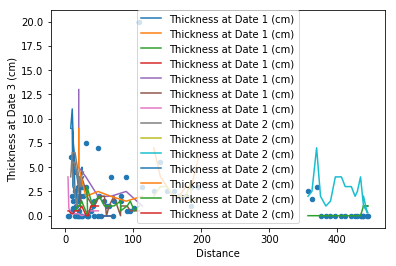

In [92]:
fig, ax = plt.subplots()
train.groupby('Site').plot(x='Distance', y='Thickness at Date 1 (cm)', 
                           ax=ax, )
train.groupby('Site').plot(x='Distance', y='Thickness at Date 2 (cm)',
                           ax=ax, )
train.groupby('Site').plot(kind='scatter', x='Distance', y='Thickness at Date 3 (cm)',ax=ax)
# thickness = ['Thickness at Date 1 (cm)', 'Thickness at Date 2 (cm)', 'Thickness at Date 3 (cm)']
# station = train['Station']
# d1 = np.array(train['Thickness at Date 1 (cm)'])
# d2 = np.array(train['Thickness at Date 2 (cm)'])
# d3 = np.array(train['Thickness at Date 3 (cm)'])
# dist = np.array(train['Distance'])

In [104]:
# fig, ax = plt.subplots()
for site in train['Site']:
    ind = train.iloc[site]
    plt.plot()
# ax = train.groupby('Site').plot(kind='scatter',x='Distance', y='Thickness at Date 1 (cm)', color='r')
# train.groupby('Site').plot(kind='scatter', x='Distance', y='Thickness at Date 2 (cm)', color='b', ax=ax)

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.numeric.Int64Index'> with these indexers [CCB] of <class 'str'>

CCB
CCB
CCB
BW2
BW2
BW2
BW2
BW2
BW2
BW2
BW2
BW2
BW2
BW2
BW2
BW3
BW3
BW3
BW3
BW3
BW3
BW3
BW3
BW3
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
UFU
SNK
SNK
SNK
SNK
SNK
SNK
SNK
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
CBD
WTZ
WTZ
WTZ
WTZ
WTZ
WTZ
WTZ
WTZ
WTZ
WTZ
WTZ
WTZ


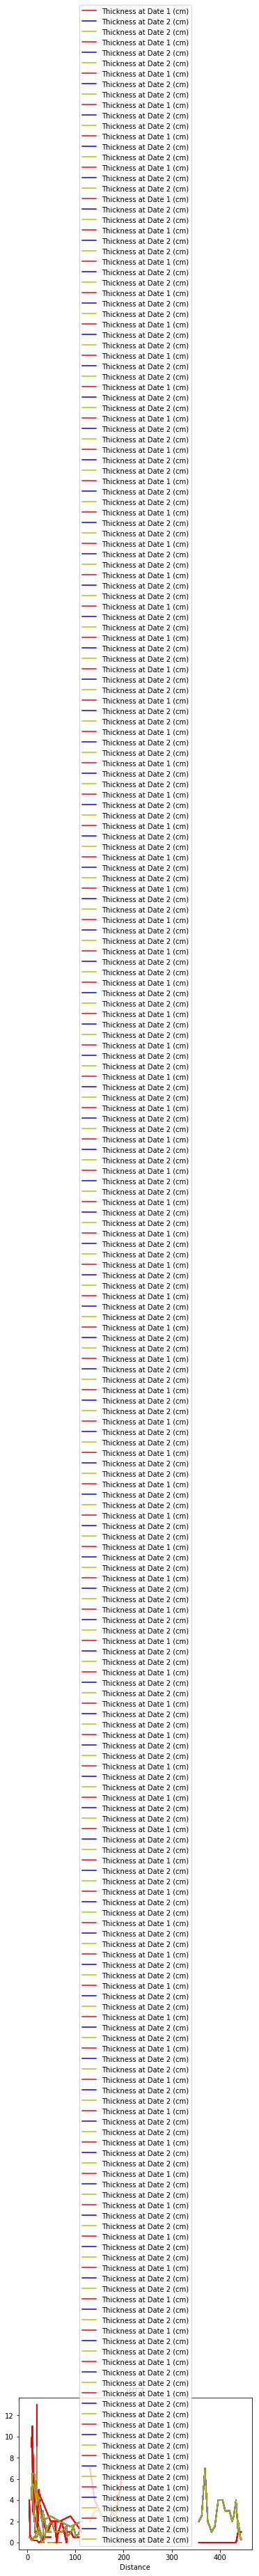

In [132]:
fig, ax = plt.subplots()
for site in train.Site:
    print(site)
    site_1 = train[train.Site == site]
    site_1.plot(x='Distance', y='Thickness at Date 1 (cm)', color='r', ax=ax)
    site_1.plot(x='Distance', y='Thickness at Date 2 (cm)', color='b',ax=ax)
    site_1.plot(x='Distance', y='Thickness at Date 2 (cm)', color='y', ax=ax)
    plt.title(site)


In [152]:
site_ccb = train[train.Site == 'CCB']
site_bw2 = train[train.Site == 'BW2']
site_bw3 = train[train.Site == 'BW3']
site_ufu = train[train.Site == 'UFU']
site_snk = train[train.Site == 'SNK']
site_cbd = train[train.Site == 'CBD']
site_wtz = train[train.Site == 'WTZ']
%matplotlib inline

,Region,Site,Station,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Thickness at Date 3 (cm),Lat,Lon,water_lat,water_lon,Unnamed: 13,Distance
0,TTI,CCB,CC1 S1,0.0,0.0,0.0,26.02238,-81.73427,26.021769,-81.734467,NaN,70.689926
4,TTI,CCB,CC2 S1,0.0,0.0,0.0,26.02202,-81.73415,26.021769,-81.734467,NaN,42.190802
8,TTI,CCB,CC3 S1,0.0,0.0,0.0,26.02143,-81.73410,26.021769,-81.734467,NaN,52.557232


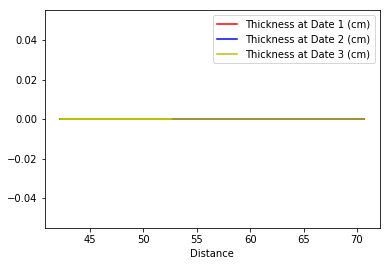

In [170]:
gig, ax = plt.subplots()
site_ccb.plot(x='Distance', y='Thickness at Date 1 (cm)', color='r', ax=ax)
site_ccb.plot(x='Distance', y='Thickness at Date 2 (cm)', color='b',ax=ax)
site_ccb.plot(x='Distance', y='Thickness at Date 3 (cm)', color='y', ax=ax)
site_ccb

,Region,Site,Station,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Thickness at Date 3 (cm),Lat,Lon,water_lat,water_lon,Unnamed: 13,Distance
12,TTI,BW2,BW2 S1,9.0,4.0,6.0,25.92489,-81.60935,25.924941,-81.609406,NaN,7.965115
13,TTI,BW2,BW2 S2,11.0,6.5,2.0,25.92488,-81.60933,25.924941,-81.609406,NaN,10.180534
14,TTI,BW2,BW2 S3,2.0,6.5,2.5,25.92490,-81.60927,25.924941,-81.609406,NaN,14.335448
15,TTI,BW2,BW2 S4,2.0,3.0,3.5,25.92485,-81.60921,25.924941,-81.609406,NaN,22.044900
16,TTI,BW2,BW2 S5,5.0,3.0,3.0,25.92484,-81.60919,25.924941,-81.609406,NaN,24.330893
17,TTI,BW2,BW2 S6,2.0,4.0,2.0,25.92481,-81.60925,25.924941,-81.609406,NaN,21.330664
18,TTI,BW2,BW2 S7,2.0,1.0,2.0,25.92482,-81.60931,25.924941,-81.609406,NaN,16.518246
19,TTI,BW2,BW2 S8,3.0,4.0,1.5,25.92486,-81.60934,25.924941,-81.609406,NaN,11.159311
20,TTI,BW2,BW2 S9,9.0,5.5,6.0,25.92488,-81.60933,25.924941,-81.609406,NaN,10.180534
21,TTI,BW2,BW2 S10,6.0,5.5,4.5,25.92484,-81.60934,25.924941,-81.609406,NaN,13.018441


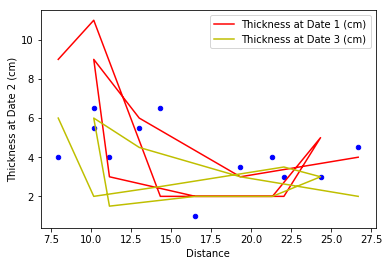

In [171]:
gig, ax = plt.subplots()
site_bw2.plot(x='Distance', y='Thickness at Date 1 (cm)', color='r', ax=ax)
site_bw2.plot(kind='scatter', x='Distance', y='Thickness at Date 2 (cm)', color='b',ax=ax)
site_bw2.plot(x='Distance', y='Thickness at Date 3 (cm)', color='y', ax=ax)
site_bw2

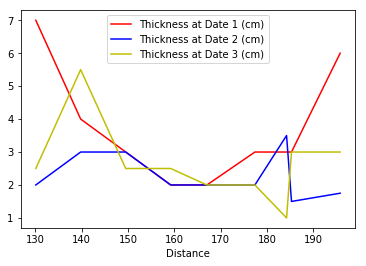

In [172]:
gig, ax = plt.subplots()
site_bw3.plot(x='Distance', y='Thickness at Date 1 (cm)', color='r', ax=ax)
site_bw3.plot(x='Distance', y='Thickness at Date 2 (cm)', color='b',ax=ax)
site_bw3.plot(x='Distance', y='Thickness at Date 3 (cm)', color='y', ax=ax)
plt.show()

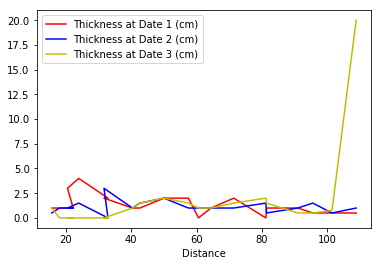

In [173]:
gig, ax = plt.subplots()
site_ufu.plot(x='Distance', y='Thickness at Date 1 (cm)', color='r', ax=ax)
site_ufu.plot(x='Distance', y='Thickness at Date 2 (cm)', color='b',ax=ax)
site_ufu.plot(x='Distance', y='Thickness at Date 3 (cm)', color='y', ax=ax)
plt.show()

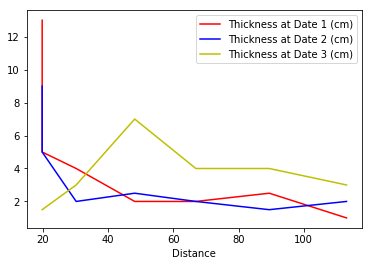

In [174]:
gig, ax = plt.subplots()
site_snk.plot(x='Distance', y='Thickness at Date 1 (cm)', color='r', ax=ax)
site_snk.plot(x='Distance', y='Thickness at Date 2 (cm)', color='b',ax=ax)
site_snk.plot(x='Distance', y='Thickness at Date 3 (cm)', color='y', ax=ax)
plt.show()

,Region,Site,Station,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Thickness at Date 3 (cm),Lat,Lon,water_lat,water_lon,Unnamed: 13,Distance
82,LFK,CBD,S1,0.0,2.0,2.50,24.65067,-81.59631,24.653879,-81.596217,NaN,356.724167
83,LFK,CBD,S2,0.0,2.5,1.75,24.65062,-81.59637,24.653879,-81.596217,NaN,362.486259
84,LFK,CBD,S3,0.0,7.0,3.00,24.65056,-81.59642,24.653879,-81.596217,NaN,369.393658
85,LFK,CBD,S4,0.0,2.0,0.00,24.65051,-81.59645,24.653879,-81.596217,NaN,375.119356
86,LFK,CBD,S5,0.0,1.0,0.00,24.65044,-81.59647,24.653879,-81.596217,NaN,383.012557
87,LFK,CBD,S6,0.0,1.5,0.00,24.65038,-81.59649,24.653879,-81.596217,10s and 100s decimal reversed,389.803132
88,LFK,CBD,S7,0.0,4.0,0.00,24.65031,-81.59638,24.653879,-81.596217,NaN,396.947049
89,LFK,CBD,S8,0.0,4.0,0.00,24.65023,-81.59639,24.653879,-81.596217,NaN,405.871801
90,LFK,CBD,S9,0.0,3.0,0.00,24.65018,-81.59639,24.653879,-81.596217,NaN,411.422976
91,LFK,CBD,S10,0.0,3.0,0.00,24.65010,-81.59641,24.653879,-81.596217,NaN,420.393949


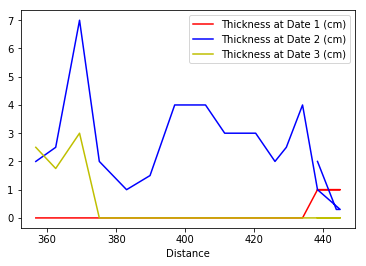

In [177]:
gig, ax = plt.subplots()
site_cbd.plot(x='Distance', y='Thickness at Date 1 (cm)', color='r', ax=ax)
site_cbd.plot(x='Distance', y='Thickness at Date 2 (cm)', color='b',ax=ax)
site_cbd.plot(x='Distance', y='Thickness at Date 3 (cm)', color='y', ax=ax)
site_cbd

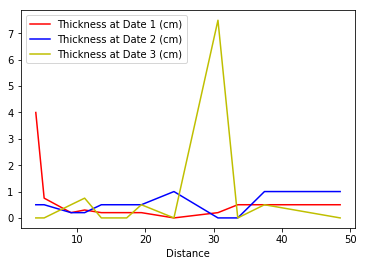

In [176]:
gig, ax = plt.subplots()
site_wtz.plot(x='Distance', y='Thickness at Date 1 (cm)', color='r', ax=ax)
site_wtz.plot(x='Distance', y='Thickness at Date 2 (cm)', color='b',ax=ax)
site_wtz.plot(x='Distance', y='Thickness at Date 3 (cm)', color='y', ax=ax)
plt.show()

In [166]:
site_wtz

,Region,Site,Station,Thickness at Date 1 (cm),Thickness at Date 2 (cm),Thickness at Date 3 (cm),Lat,Lon,water_lat,water_lon,Unnamed: 13,Distance
115,LFK,WTZ,S1,0.50,1.0,0.00,24.64750,-81.65353,24.647714,-81.653949,NaN,48.543182
116,LFK,WTZ,S2,0.50,1.0,0.50,24.64760,-81.65360,24.647714,-81.653949,NaN,37.456482
117,LFK,WTZ,S3,0.50,0.0,0.00,24.64763,-81.65363,24.647714,-81.653949,NaN,33.544092
118,LFK,WTZ,S4,0.20,0.0,7.50,24.64763,-81.65366,24.647714,-81.653949,NaN,30.645362
119,LFK,WTZ,S5,0.00,1.0,0.00,24.64765,-81.65372,24.647714,-81.653949,NaN,24.197849
120,LFK,WTZ,S6,0.20,0.5,0.50,24.64765,-81.65377,24.647714,-81.653949,NaN,19.427653
121,LFK,WTZ,S7,0.20,0.5,0.00,24.64769,-81.65378,24.647714,-81.653949,NaN,17.276171
122,LFK,WTZ,S8,0.20,0.5,0.00,24.64768,-81.65382,24.647714,-81.653949,NaN,13.565820
123,LFK,WTZ,S9,0.30,0.2,0.75,24.64770,-81.65384,24.647714,-81.653949,NaN,11.118428
124,LFK,WTZ,S10,0.20,0.2,0.50,24.64770,-81.65386,24.647714,-81.653949,NaN,9.122672
